# Pymaceuticals Inc.
---

### Analysis

Conclusions:
- There is a positive correlation between mouse weight and tumor volume for the Capomulin regimen. The calculated Pearson correlation coefficient suggested a positive relationship, meaning that as the weight of the mice increases, the tumor volume also tends to increase. This could suggest that heavier mice in the Capomulin treatment group have larger tumors.
- Linear regression indicates a clear linear trend between weight and tumor volume. The linear regression model suggests that there is a predictive relationship between mouse weight and tumor volume. The slope of the regression line indicates the rate of increase in tumor volume as the weight of the mice increases, providing insights that could help in predicting tumor growth based on the weight of the animals. Further investigation into this relationship could lead to more refined models for tumor growth predictions in response to treatment.

These conclusions contribute to a better understanding of the relationship between weight and tumor volume under the Capomulin regimen, which could potentially help in designing treatment plans and further analyzing the impact of weight on drug effectiveness.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
unique_mice = combined_data["Mouse ID"].unique()
total_mice = len(unique_mice)
total_mice

249

In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)]

# Get the unique Mouse IDs with duplicates
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice_ids) == False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem')

summary_stats

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem')

summary_stats

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

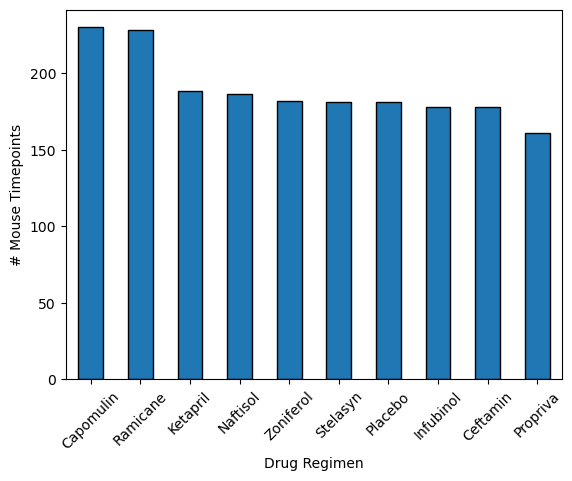

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = combined_data["Drug Regimen"].value_counts()

# Plot the bar plot
drug_counts.plot(kind="bar", edgecolor="black")
plt.xlabel("Drug Regimen")
plt.ylabel("# Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()

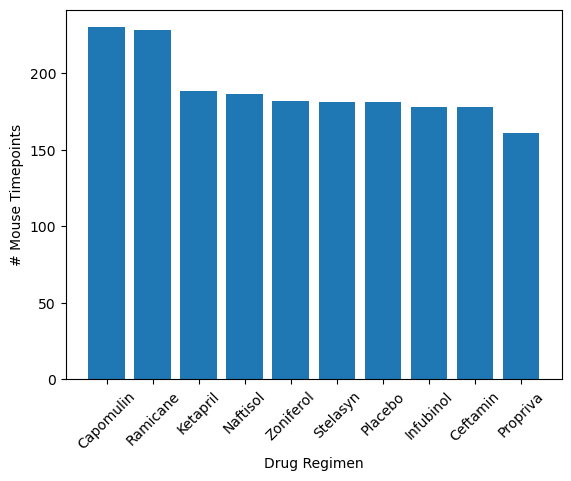

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_counts.index, drug_counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()

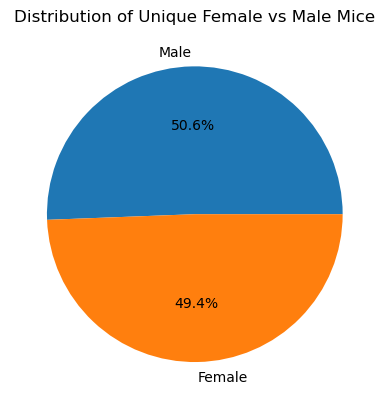

In [45]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_counts = combined_data["Sex"].value_counts()

# Make the pie chart
sex_counts.plot(kind = "pie", autopct = "%1.1f%%")
plt.title("Distribution of Unique Female vs Male Mice")
plt.ylabel("")  # Hide the y-label for a cleaner look
plt.show()

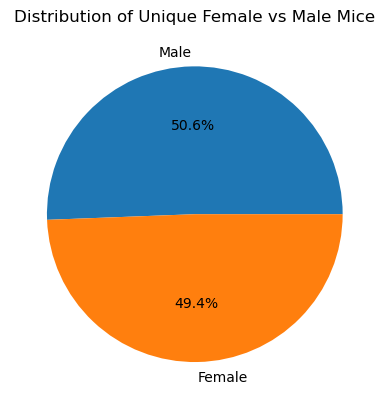

In [51]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.pie(sex_counts, labels = sex_counts.index, autopct = "%1.1f%%")
plt.title("Distribution of Unique Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoint, combined_data, on = ["Mouse ID", "Timepoint"])
final_tumor_volume = last_timepoint_data[last_timepoint_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug} outliers: {outliers}")


Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<Figure size 1000x600 with 0 Axes>

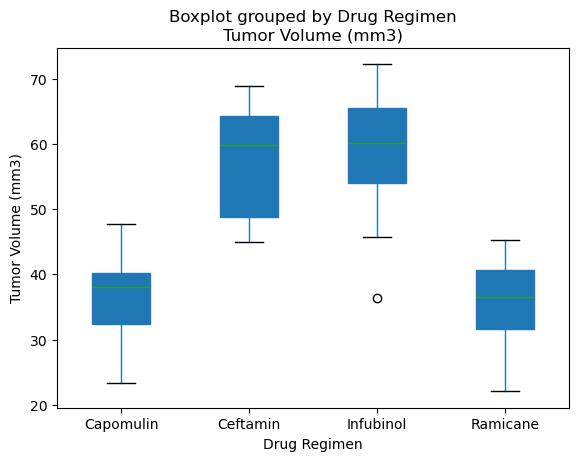

In [85]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize = (10, 6))
subset.boxplot(column = "Tumor Volume (mm3)", by = "Drug Regimen", grid = False, patch_artist = True)

# Adding titles and labels
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

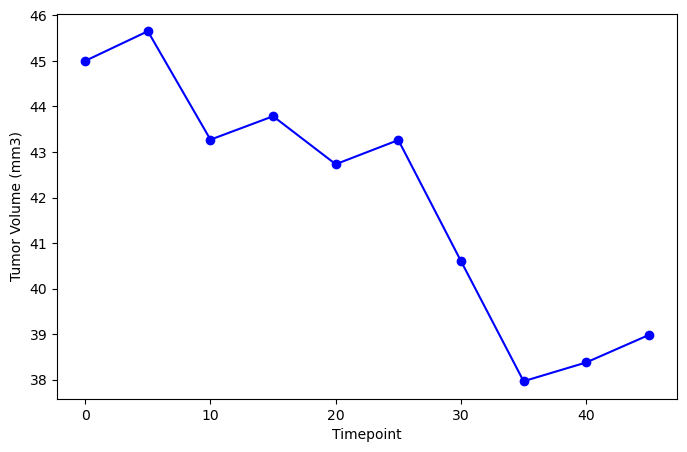

In [89]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = combined_data[(combined_data["Drug Regimen"] == "Capomulin")]
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == "b128"]  # Replace 'b128' with any specific Mouse ID in your data

# Plotting the line plot
plt.figure(figsize=(8, 5))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o", linestyle="-", color="b")

# Adding titles and labels
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

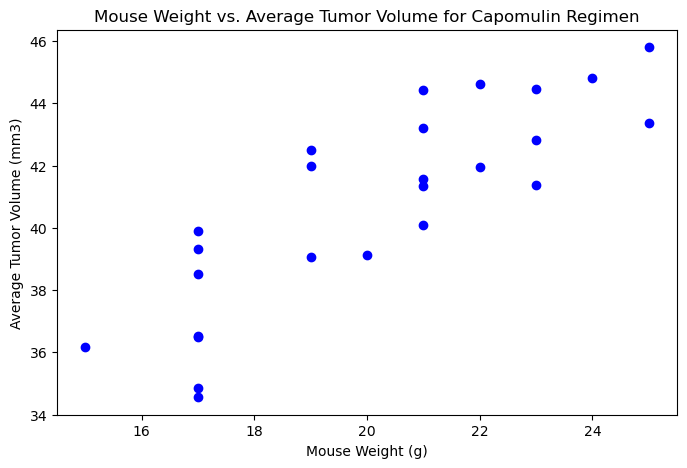

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for Capomulin regimen
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weight
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()  # Get the weight for each mouse

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(mouse_weights, average_tumor_volume, marker="o", color="b")

# Adding titles and labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

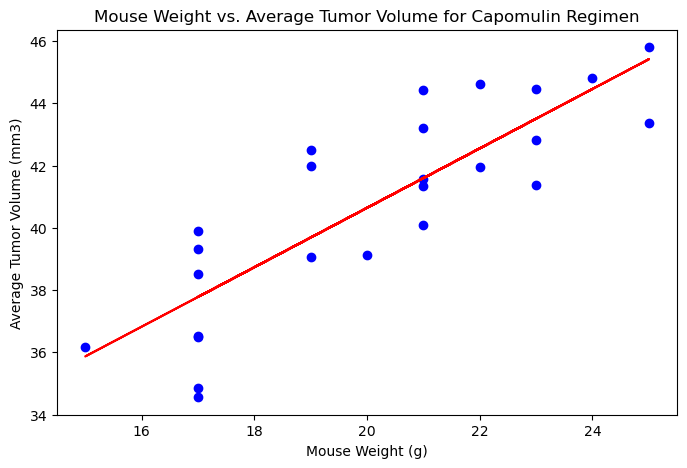

In [97]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as stats

# Calculate the correlation coefficient
correlation_coefficient, _ = stats.pearsonr(mouse_weights, average_tumor_volume)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(mouse_weights, average_tumor_volume)

plt.figure(figsize=(8, 5))
plt.scatter(mouse_weights, average_tumor_volume, color="b", label="Data points")

regression_line = slope * mouse_weights + intercept
plt.plot(mouse_weights, regression_line, color="r", label="Linear regression line")

# Adding titles and labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()